* **The problem s as stated below:**

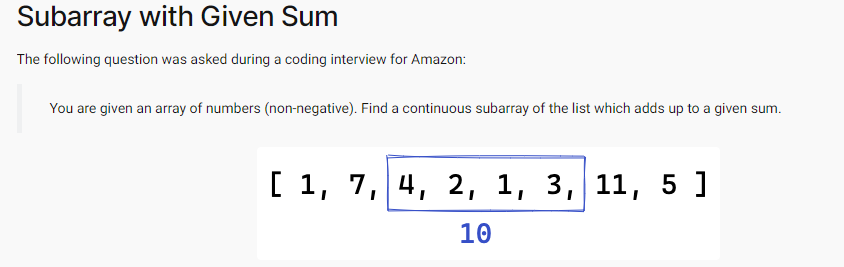

In [1]:
arr1 = [1, 7, 4, 2, 1, 3, 11, 5]
target1 = 10

In [25]:
import random

In [30]:

arr2=[random.randint(1,300000) for _ in range(200000)]
target2=200000

In [29]:

arr2[:15]

[116089,
 213650,
 114965,
 111881,
 234230,
 67173,
 56285,
 203934,
 228796,
 276054,
 13730,
 268516,
 262290,
 32543,
 54143]

In [15]:
def sum1(arr,targ):

  n=len(arr)
  for i in range(n):
    for j in range(i,n+1):

      #if j < n:
      s=sum(arr[i:j])
        #print(s)
      if s==targ:
        return i,j
  return None,None

In [16]:
sum1(arr1,target1)

(2, 6)

In [18]:
arr1[2:6]

[4, 2, 1, 3]

In [23]:
def sum2(arr,targ):
  n=len(arr)
  for i in range(n):

    s=0
    for j in range(i,n+1):
      if s==targ:
        return i,j

      elif s> targ:
        break

      if j < n:
        s+=arr[j]
  return None,None



In [24]:
sum2(arr1,target1)

(2, 6)

* This just keeps on executing, I don't know how much time it will take, as it has complexity of n^3

In [ ]:
%%time
sum1(arr2,target2)

In [32]:
%%time
sum2(arr2,target2)

CPU times: user 46.4 ms, sys: 1.01 ms, total: 47.4 ms
Wall time: 54.2 ms


(55396, 55398)

In [33]:
arr2[55396:55398]

[182945, 17055]

In [35]:
sum(arr2[55396:55398])

200000

* **Now we will use a greedy approach, it is a problem solving approach of making the locally optimal choice at each stage with the hope of finding a global optimum.**

In [61]:
def sum3(arr,target):

  n=len(arr)

  i,j,s=0,0,0
  while i < n and j <= n:

    if s==target:
      return i,j
    elif s < target and j < n:
      s+=arr[j]
      j+=1

    elif s > target:
      s-=arr[i]
      i+=1
  return None,None

In [62]:
%%time
sum3(arr2,target2)

CPU times: user 30.7 ms, sys: 0 ns, total: 30.7 ms
Wall time: 34.8 ms


(55396, 55398)

In [59]:
def subarray_sum3(arr, target):
    n = len(arr)
    i, j, s = 0, 0, 0
    while i < n and j <= n:
        if s == target:
            return i, j
        elif s < target:
            s += arr[j]
            j += 1
        elif s > target:
            s -= arr[i]
            i += 1
    return None, None
        

In [60]:
%%time
subarray_sum3(arr2,target2)

CPU times: user 30.5 ms, sys: 0 ns, total: 30.5 ms
Wall time: 35.3 ms


(55396, 55398)

## Optimal Task Assignment

In [37]:
test=[6,3,2,7]

In [46]:
def optimal_fnc(arr):

  n=len(arr)
  table=[[0 for _ in range(n+1)] for _ in range(n+1)]


  for i in range(n):

    for c in range(n):
      table[i][c]=arr[i]+arr[c]

  return table

def optimal_fnc2(arr):

  n=len(arr)
  table=[[0 for _ in range(n)] for _ in range(n)]


  for i in range(n):

    for c in range(n):
      table[i][c]=arr[i]+arr[c]

  return table







    







    



In [45]:
optimal_fnc(test),optimal_fnc2(test)

([[12, 9, 8, 13, 0],
  [9, 6, 5, 10, 0],
  [8, 5, 4, 9, 0],
  [13, 10, 9, 14, 0],
  [0, 0, 0, 0, 0]],
 [[12, 9, 8, 13], [9, 6, 5, 10], [8, 5, 4, 9], [13, 10, 9, 14], [0, 0, 0, 0]])

In [47]:
a=optimal_fnc2(test)
type(a),a

(list, [[12, 9, 8, 13], [9, 6, 5, 10], [8, 5, 4, 9], [13, 10, 9, 14]])

In [49]:
import numpy as np
np_a=np.array(a)

In [52]:
np.fill_diagonal(np_a,0)
np_a

array([[ 0,  9,  8, 13],
       [ 9,  0,  5, 10],
       [ 8,  5,  0,  9],
       [13, 10,  9,  0]])

In [53]:
np.argmin(np_a)

0